<h1 align='center' style="color: blue;">Text Analysis - Part I</h1>

Because text analysis techniques are primarily applied machine learning, a language that has rich scientific and numeric computing libraries is necessary. When it comes to tools for performing machine learning on text, Python has a powerhouse suite that includes Scikit-Learn, NLTK, Gensim, spaCy, NetworkX, and Yellowbrick. We will see the application of some these tools in this course.

In [26]:
import pandas as pd
import numpy as np

In [ ]:
#https://monstott.github.io/sentiment_analysis_and_classification_of_amazon_imdb_and_yelp_reviews
#https://machinelearningmastery.com/predict-sentiment-movie-reviews-using-deep-learning/
#https://towardsdatascience.com/a-complete-step-by-step-tutorial-on-sentiment-analysis-in-keras-and-tensorflow-ea420cc8913f    

## 1. Preprocessing (Bag of Words)

Let's start looking at some textual data.

In [27]:
filepath_dict = {'yelp':   'sentiment_analysis/yelp_labelled.txt',
                 'amazon': 'sentiment_analysis/amazon_cells_labelled.txt',
                 'imdb':   'sentiment_analysis/imdb_labelled.txt'}

df_list =[]
for source,filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names = ['sentence', 'label'], sep = '\t')
    df['source'] = source
    df_list.append(df)

df = pd.concat(df_list)
print(df.iloc[0])

sentence    Wow... Loved this place.
label                              1
source                          yelp
Name: 0, dtype: object


As you can see there is no structred feature here that allows us to conduct analysis. One of the most simple but effective approach is using the bag-of-words representation. When using this representation, we discard most of the structure of the input text, like chapters, paragraphs, sentences, and formatting, and only count how often each word appears in each text. Computing the bag-of-words consists of the following steps:

<ul>
    <li><b>Tokenization:</b> Split each document into the words that appear in it (called tokens)</li>
    <li><b>Vocabulary building:</b> Collect a vocabulary of all words that appear in any of the text documents</li>
    <li><b>Encoding:</b> For each text document, count the number of times that each word in the vocabulary appears in the document.</li>
</ul>

<b>Note:</b> you can use <b style='color:blue'>CountVectorizer( )</b> to perform the above tasks.

<b>Example:</b> Let's find vocabulary of words for my_data

In [28]:
sentences = ['John likes ice cream', 'John hates chocolate.']

<b>Question:</b> Should we allow the tokenizer to convert words to lowercase?

Now, let's create the bag of words matrix:

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(sentences)
vectorizer.vocabulary_

{'John': 0, 'likes': 5, 'ice': 4, 'cream': 2, 'hates': 3, 'chocolate': 1}

The bag-of-words representation is stored in a SciPy sparse matrix that only stores the entries that are nonzero

<b>Note:</b> you can use <b style='color:blue'>toarray( )</b> function to convert the SciPy matrix to a numpy array.

In [30]:
vectorizer.transform(sentences).toarray()

array([[1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 0]])

In [31]:
from sklearn.model_selection import train_test_split

df_yelp = df[df['source'] == 'yelp']

sentences = df_yelp['sentence'].values
y = df_yelp['label'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test = vectorizer.transform(sentences_test)
X_train

<750x1714 sparse matrix of type '<class 'numpy.int64'>'
	with 7368 stored elements in Compressed Sparse Row format>

In [33]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.796


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
for source in df['source'].unique():
    df_source = df[df['source'] == source]
    sentences = df_source['sentence'].values
    y = df_source['label'].values
    
    sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
    
    vectorizer = CountVectorizer()
    vectorizer.fit(sentences_train)
    
    X_train = vectorizer.transform(sentences_train)
    X_test = vectorizer.transform(sentences_test)
    
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)

    score = classifier.score(X_test, y_test)

    print('Accuracy for {} data: {:.4f}'.format(source,score))  

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for yelp data: 0.7960
Accuracy for amazon data: 0.7960
Accuracy for imdb data: 0.7487


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
pip install keras

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [36]:
#HOME/.keras/keras.json

In [37]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [38]:
model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                25060     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 25,071
Trainable params: 25,071
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = model.fit(X_train, y_train,
                   epochs=100,
                  verbose=False,
                   validation_data=(X_test, y_test),
                    batch_size=10)

In [40]:
from keras.backend import clear_session
clear_session()

In [41]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: {:.4f}". format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy: 0.7754


In [46]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plot_history(history)

In [47]:
cities = ['London', 'Berlin', 'Berlin', 'New York', 'London']
cities

['London', 'Berlin', 'Berlin', 'New York', 'London']

In [48]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
city_labels = encoder.fit_transform(cities)

city_labels

array([1, 0, 0, 2, 1])

In [49]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
city_labels = city_labels.reshape((5, 1))
encoder.fit_transform(city_labels)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sentences_train[2])
print(X_train[2])

In [ ]:
tokenizer = Tokenizer(num_words

In the above matrix, columns represent features and rows represent samples.

<b>Note:</b> you can use <b style='color:blue'>get_feature_names( )</b> function to get feature names for bag_of_words matrix

Here is a more complete view

<b>Note:</b> If you don't want to use all the possible words in formation of bag of words, then you can specify the vocabulary. 

<b>Example:</b> Consider the following dataset, find the bag of words matrix. What is the vocabulary size?

In [12]:
news_txt_data = pd.read_csv("news/abcnews-date-text.csv", nrows=10)
news_txt_data

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
5,20030219,ambitious olsson wins triple jump
6,20030219,antic delighted with record breaking barca
7,20030219,aussie qualifier stosur wastes four memphis match
8,20030219,aust addresses un security council over iraq
9,20030219,australia is locked into war timetable opp


In [13]:
bag_of_words = vect.transform(news_txt_data.headline_text)

vect = CountVectorizer(lowercase=False)

vect.fit(news_txt_data.headline_text)

bag_of_words = vect.transform(news_txt_data.headline_text)
#bag_of_words.toarray()
bag_of_words.A.shape

(10, 62)

In [14]:
vect.get_feature_names()

['aba',
 'act',
 'addresses',
 'affect',
 'against',
 'air',
 'ambitious',
 'antic',
 'aussie',
 'aust',
 'australia',
 'australian',
 'aware',
 'barca',
 'be',
 'breaking',
 'broadcasting',
 'calls',
 'community',
 'council',
 'decides',
 'defamation',
 'delighted',
 'fire',
 'for',
 'four',
 'in',
 'infrastructure',
 'into',
 'iraq',
 'is',
 'jump',
 'licence',
 'locked',
 'match',
 'memphis',
 'must',
 'nz',
 'of',
 'olsson',
 'opp',
 'over',
 'pay',
 'protection',
 'qualifier',
 'record',
 'rise',
 'security',
 'staff',
 'stosur',
 'strike',
 'summit',
 'timetable',
 'to',
 'travellers',
 'triple',
 'un',
 'war',
 'wastes',
 'wins',
 'with',
 'witnesses']

In [15]:
pd.DataFrame(bag_of_words.toarray(), columns=vect.get_feature_names())

,aba,act,addresses,affect,against,air,ambitious,antic,aussie,aust,...,timetable,to,travellers,triple,un,war,wastes,wins,with,witnesses
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


## 1.1. N-Grams

What we have seen so far is using words (uni-grams) as features. One of the main disadvantages of this approach is that word order is completely discarded. Therefore, the two strings <b>"it's bad, not good at all"</b> and <b>"it's good, not bad at all"</b> have exactly the same representation, even though the meanings are inverted. We can handle this issue by considering pairs or triplets of tokens that appear next to each other. <u>Pairs</u> of tokens are known as <b>bigrams</b>, <u>triplets</u> of tokens are known as <b>trigrams</b>, and more generally sequences of tokens are known as <b>n-grams</b>.

<b>Note:</b> You can capture the desired n-gram features by changing <b style="color:blue">ngram_range</b> parameter.

In [16]:
#initializer
vect = CountVectorizer(ngram_range=(1,3))
#train
vect.fit(my_data['some_text'])
#transform
TFM = vect.transform(my_data.some_text)

pd.DataFrame(TFM.toarray(), columns=vect.get_feature_names())

,book,is,is my,is my book,is your,is your phone,my,my book,phone,this,this is,this is my,this is your,your,your phone
0,1,1,1,1,0,0,1,1,0,1,1,1,0,0,0
1,0,1,0,0,1,1,0,0,1,1,1,0,1,1,1


<b>Example:</b> Consider the following dataset, find Term-Frequency Matrix with all unigram, bigram, and trigram features. What is the vocabulary size?

In [17]:
news_txt_data = pd.read_csv("news/abcnews-date-text.csv", nrows=10)
news_txt_data

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
5,20030219,ambitious olsson wins triple jump
6,20030219,antic delighted with record breaking barca
7,20030219,aussie qualifier stosur wastes four memphis match
8,20030219,aust addresses un security council over iraq
9,20030219,australia is locked into war timetable opp


In [18]:
vect = CountVectorizer(ngram_range=(1,3)).fit(news_txt_data.headline_text)
TFM = vect.transform(news_txt_data.headline_text)
pd.DataFrame(TFM.toarray(), columns=vect.get_feature_names())


,aba,aba decides,aba decides against,act,act fire,act fire witnesses,addresses,addresses un,addresses un security,affect,...,wastes four memphis,wins,wins triple,wins triple jump,with,with record,with record breaking,witnesses,witnesses must,witnesses must be
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 1.2. Stopwords, and Frequency Filters

<b>Note:</b> As you noticed, the number of features could increase exponentially. Therefore, it is good to remove uninformatives features. Here we introduce two types of features that can be considered to be removed:
<ul>
    <li><b>Stopwords:</b> Words like "the" repeat too frequently and it is good to be removed. You can use <b style="color:blue">stop_words="english"</b> to remove stopwrods.</li>
    <li><b>Low frequency words:</b> Words that are not repeated frequently - this size highly depends on the overall number of text documents and number of words in each text . You can use <b style="color:blue">min_df</b> to remove low frequency terms.</li>
</ul>

Let's consider this example again:

In [19]:
news_txt_data = pd.read_csv("news/abcnews-date-text.csv", nrows=10)
news_txt_data

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
5,20030219,ambitious olsson wins triple jump
6,20030219,antic delighted with record breaking barca
7,20030219,aussie qualifier stosur wastes four memphis match
8,20030219,aust addresses un security council over iraq
9,20030219,australia is locked into war timetable opp


In [20]:
vect = CountVectorizer(ngram_range=(1,3), stop_words="english").fit(news_txt_data.headline_text)
len(vect.vocabulary_)

121

<b>Example:</b> Let's see an example of supervised learning using what we've learnt so far. The following dataset contains movie reviews along with their associated binary sentiment polarity labels. Let's explore the dataset

In [21]:
from sklearn.datasets import load_files

reviews_train = load_files("aclImdb/train/")

# load_files returns a bunch, containing training texts and training labels 
text, y = reviews_train.data, reviews_train.target
print("type of text_train: {}".format(type(text)))
print()
print("length of text_train: {}".format(len(text))) 
print()
print("text[0]:\n{}".format(text[0]))
print()
print("y[0]:{}".format(y[0]))

type of text_train: <class 'list'>

length of text_train: 75000

text[0]:
b'Full of (then) unknown actors TSF is a great big cuddly romp of a film.<br /><br />The idea of a bunch of bored teenagers ripping off the local sink factory is odd enough, but add in the black humour that Forsyth & Co are so good at and your in for a real treat.<br /><br />The comatose van driver by itself worth seeing, and the canal side chase is just too real to be anything but funny.<br /><br />And for anyone who lived in Glasgow it\'s a great "Oh I know where that is" film.'

y[0]:2


In [79]:
#impost tarfile
#tar = tarfile.open('aclImdb_val.tar.gz',"r:gz")
#tar.extractall()
#tar.close()

In [22]:
set(y)    # 0: neg sentiment, 1: positive

{0, 1, 2}

It is always good to remove useless textual data. Let's remove html tags from texts 

In [23]:
text = [doc.replace(b"<br />", b" ") for doc in text]
text[0]

b'Full of (then) unknown actors TSF is a great big cuddly romp of a film.  The idea of a bunch of bored teenagers ripping off the local sink factory is odd enough, but add in the black humour that Forsyth & Co are so good at and your in for a real treat.  The comatose van driver by itself worth seeing, and the canal side chase is just too real to be anything but funny.  And for anyone who lived in Glasgow it\'s a great "Oh I know where that is" film.'

Let's see the number of observations in each category

In [24]:
np.bincount(y)

array([12500, 12500, 50000])

It's time to form the <b>X</b> matrix using bag of words (unigrams) 

In [25]:
vect = CountVectorizer(stop_words="english").fit(text)

X = vect.transform(text)

In [26]:
print("The number of features are: {}".format(len(vect.get_feature_names())))

The number of features are: 123941


In [27]:
X.shape

(75000, 123941)

Now, we can train a logistic regression model and test its performance.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib

#initialize
model = LogisticRegression()

#split data into train and test 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

#train 70%
model.fit(X_train, y_train)

#prediction on test 30%
y_test_hat = model.predict(X_test)

print(round(accuracy_score(y_test,y_test_hat) * 100,2))

filename = 'finalized_model.pkl'
joblib.dump(model, filename)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureW

70.06


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


['finalized_model.pkl']

In [29]:
# some time later...
from sklearn.externals import joblib

# load the model from disk
filename = 'finalized_model.pkl'
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.7006222222222223


<b>Example:</b> Use cross validation and checked the accuracy of your prediction.

In [30]:
# Write your code here
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

accuracy_model = cross_val_score(model, X, y, cv=5, scoring='accuracy')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<b>Note:</b> Some algorithms like SVM requires larger amount of time to converge.

<b>Example:</b> Add bigram and trigram features to your predictive model.

In [20]:
vect = CountVectorizer(ngram_range=(1,3), stop_words="english").fit(text) 
X = vect.transform(text)

In [21]:
print("The number of features are: {}".format(len(vect.get_feature_names())))

The number of features are: 11766329


In [30]:
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model.fit(X_train, y_train) #fit -> train
y_test_hat = model.predict(X_test) #out of sample prediction
round(accuracy_score(y_test, y_test_hat) * 100,2)

71.13

<b>Note:</b> When you have large number of features, <u>regularization</u> can be an effecive approach to improve out of sample prediction.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10]}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5) 

grid.fit(X, y)
print("Best cross-validation score: {:.2f}".format(grid.best_score_*100)) 
print("Best parameters: ", grid.best_params_)

## 1.3. Rescaling the Data with TF–IDF

One of the most common ways to assign wights to different terms is using term frequency–inverse document frequency (TF-IDF) method. The intuition of this method is to give high weight to any term that appears often in a particular <b>document</b>, but not in many documents in the <b>corpus</b>. If a word appears often in a particular document, but not in very many documents, it is likely to be very descriptive of the content of that document. TF-IDF can be computed using the following formula.

<div style='text-align:center'> TF-IDF$(term,d) =$ TF $\times log (\frac{N+1}{N_{term} +1})+1$</div>

where $N$ is the number of documents in the training set, $N_{term}$ is the number of documents in the training set that the $term$ appears in, and TF (the term frequency) is the number of times that the term appears in the query document d.

scikit-learn implements the TF-IDF method in two classes: 
<ul>
    <li><b>TfidfTransformer:</b> Takes in the sparse matrix output produced by CountVectorizer and transforms it</li>
    <li><b>TfidfVectorizer:</b> Takes in the text data and does both the bag-of-words feature extraction and the TF–IDF transformation</li>
</ul>

Both classes also apply L2 normalization (Sum of squares of vector elements is 1) by default after computing the tf–idf representation

Let's see the result in action.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

sample = ['problem of evil','evil queen','horizon problem']

vect = TfidfVectorizer(ngram_range=(1,3))

X = vect.fit_transform(sample)

pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

,evil,evil queen,horizon,horizon problem,of,of evil,problem,problem of,problem of evil,queen
0,0.334907,0.000000,0.000000,0.000000,0.440362,0.440362,0.334907,0.440362,0.440362,0.000000
1,0.473630,0.622766,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.622766
2,0.000000,0.000000,0.622766,0.622766,0.000000,0.000000,0.473630,0.000000,0.000000,0.000000


Now, let's see whether it can improve the result of our predictive model or not.

In [9]:
# initialize and fit(train)
vect = TfidfVectorizer(ngram_range=(1,3), stop_words="english").fit(text) 

X = vect.transform(text)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model = LogisticRegression(C=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
round(accuracy_score(y_test,y_test_hat) * 100,2)

<b>Question:</b> What do low TF-IDF and high TF-IDF values mean in this context?

While we have normalize values for features, we can take a look at features' coeffcients and interpret their importance.

In [ ]:
coef = model.coef_[0]
features = vect.get_feature_names()

In [ ]:
top_20_neg_index = np.argsort(coef)[0:20]
top_20_pos_index = np.argsort(coef)[-21:]

top_20_neg_term = [features[index] for index in top_20_neg_index]
top_20_pos_term = [features[index] for index in top_20_pos_index]

print("Here is the list of negative terms:\n{}".format(top_20_neg_term))
print()
print("Here is the list of positive terms:\n{}".format(top_20_pos_term))

## 2. Generating Word Clouds

#### Source: Datacamp - https://www.datacamp.com/community/tutorials/wordcloud-python

In [24]:
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#import sys
#cloud install yes prefix ("sys.prefix")worldcloud

Download the wine review dataset from here: https://www.kaggle.com/zynicide/wine-reviews/data#winemag-data-130k-v2.csv

Now, read the dataset. Notice the use of <b>index_col=0</b> meaning we don't read in row name (index) as a separated column

In [25]:
df = pd.read_csv("wine-reviews/winemag-data-130k-v2.csv",index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Let's start with first two reviews

In [26]:
reviews = df.description[0:2]
reviews

0    Aromas include tropical fruit, broom, brimston...
1    This is ripe and fruity, a wine that is smooth...
Name: description, dtype: object

In [43]:
vect = CountVectorizer()
vect.fit(reviews)
bag_of_words = vect.transform(reviews)
pd.DataFrame(bag_of_words.toarray(), columns=vect.get_feature_names())

,2016,acidity,alongside,already,although,and,apple,are,aromas,be,...,tannins,that,the,this,tropical,unripened,while,will,wine,with
0,0,1,1,0,0,2,1,0,1,0,...,0,0,1,0,1,1,0,0,0,0
1,1,1,0,1,1,2,0,1,0,1,...,1,1,0,1,0,0,1,1,1,2


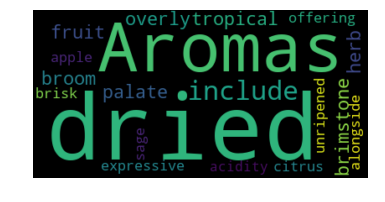

In [28]:
wordcloud = WordCloud().generate(reviews[0])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

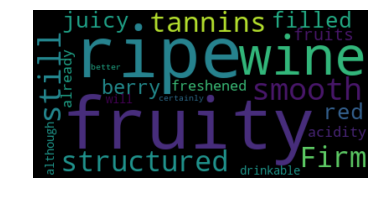

In [29]:
wordcloud = WordCloud().generate(reviews[1])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

Here are some additional attributes that can give you more flexibility:
<ul>
    <ul>
        <li><b>max_font_size:</b> Allows you to control the font_size</li>
        <li><b>max_words:</b> Alows you to control the number of words in the world cloud</li>
        <li><b>background_color:</b> Allows you to change the background color</li>
    </ul>
</ul>

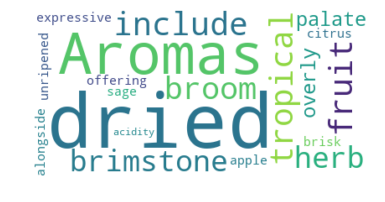

In [30]:
wordcloud = WordCloud(max_font_size=90, max_words=100, background_color="white").generate(reviews[0])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");

<b>Note:</b> You can use the <b style="color:blue">to_file( )</b> function to save an image.

In [31]:
wordcloud.to_file("first_review.png")

Now, let's join all reviews and find prominent keywors used in description of wines.  

In [32]:
text = " ".join(review for review in df.description)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 31661073 words in the combination of all review.


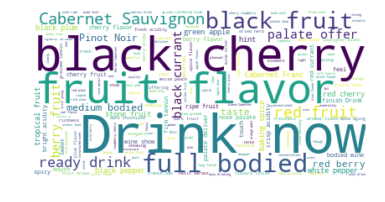

In [33]:
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

We expect that some terms like "Drink" repeatedly appear in wine reviews. Let's remove these obvious words by adding them to STOPWORDS.

In [ ]:
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

You can also use masks like the image bellow to make the word cloud more interesting:
<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1530033379/wine_mask_xgk1tq.png" />

In [35]:
wine_mask = np.array(Image.open("wine_mask.png"))
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

The way the masking functions works is that it requires all white part of the mask should be 255 not 0 (integer type). This value represents the "intensity" of the pixel. Values of 255 are pure white, whereas values of 1 are black. Here, you can use the provided function below to transform your mask if your mask has the same format as above. Notice if you have a mask that the background is not 0, but 1 or 2, adjust the function to match your mask.

In [37]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [38]:
wine_mask.shape

(512, 512)

In [40]:
# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

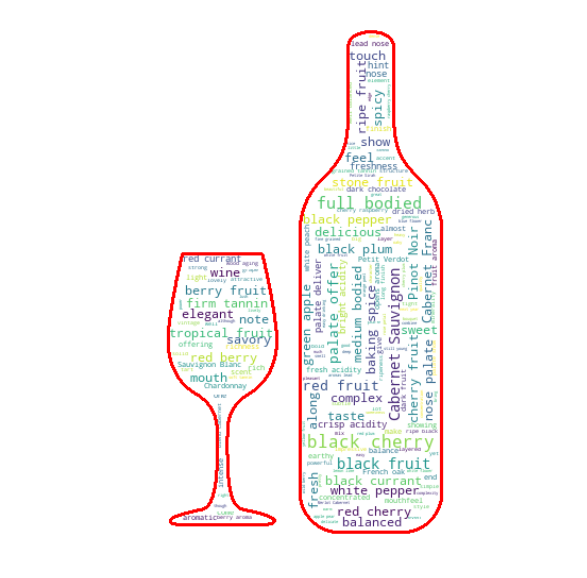

In [41]:
wc = WordCloud(background_color="white", max_words=1000, 
               mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, 
               contour_color='red')
wc.generate(text)

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");

Let's download an image and apply the mask to it

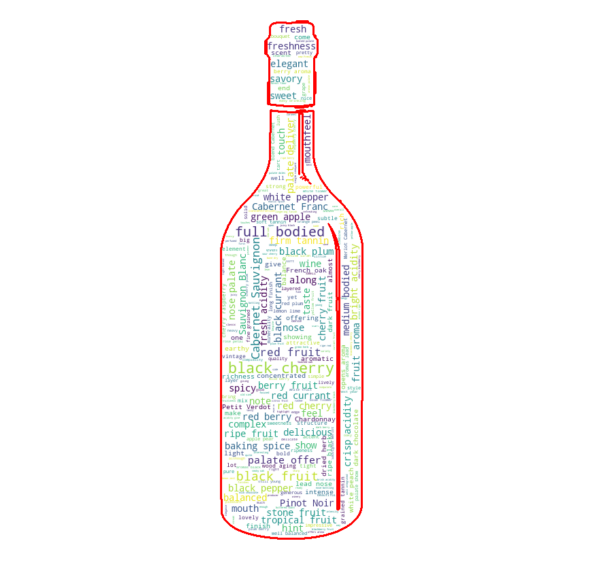

In [42]:
wine_mask = np.array(Image.open("wine_mask2.png").convert('L'))

transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

wc = WordCloud(background_color="white", max_words=500, 
               mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, 
               contour_color='red')
wc.generate(text)

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");

## 3. Advanced Tokenization, Stemming, and Lemmatization

Feature extraction in the <i>CountVectorizer</i> and <i>TfidfVectorizer</i> is relatively simple, and much more elaborate methods are possible. Tokenization is the main step that we can have some improvements. <b>Stemming</b>, and <b>Lemmatization</b> are the main approaches that allow us to improve the tokenization. 

In Stemming approach, we use root of terms to represent them. Consider <b>"drawback"</b> (singular form) and <b>"drawbacks"</b> (plural form), they both refer to the same word and usuing them as two separate feature can only lead to overfitting. Stemming allows us to "drawback" as the root of both words and represent them as one feature. The same concept can apply to different forms of verb like <b>"replace"</b>, <b>"replaced"</b>, <b>"replacement"</b>, <b>"replaces"</b>, and <b>"replacing"</b>. Stemming allows us to overcome this issue.  

<b>Example:</b> Let's see an example:

In [1]:
import sys
!conda install --yes --prefix "{sys.prefix}" nltk

/bin/sh: conda: command not found


In [45]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/razi/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /Users/razi/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [46]:
my_text = ["Our meeting today was worse than yesterday","I'm scared of meeting the clients tomorrow."]

In [47]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# instantiate nltk's Porter stemmer 
stemmer = PorterStemmer()

for text in my_text:
    tokens = word_tokenize(text)
    print([stemmer.stem(token) for token in tokens])

['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday']
['I', "'m", 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


Lemmatization is another approach to normalize textual documents that can take the part-of-speach into account.

In [49]:
from nltk.stem import WordNetLemmatizer

# instantiate nltk's WordNet Lemmatizer 
Lemmatizer = WordNetLemmatizer()

for text in my_text:
    tokens = word_tokenize(text)
    print([Lemmatizer.lemmatize(token, pos="v") for token in tokens])

['Our', 'meet', 'today', 'be', 'worse', 'than', 'yesterday']
['I', "'m", 'scar', 'of', 'meet', 'the', 'clients', 'tomorrow', '.']


In [50]:
import sys
!conda install --yes --prefix "{sys.prefix}" spacy 

Solving environment: done

## Package Plan ##

  environment location: /anaconda3

  added / updated specs:
    - spacy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cymem-2.0.2                |   py37h04f5b5a_0          30 KB
    dill-0.2.9                 |           py37_0         116 KB
    msgpack-numpy-0.4.3.2      |           py37_0          14 KB
    murmurhash-1.0.2           |   py37h0a44026_0          24 KB
    plac-0.9.6                 |           py37_0          36 KB
    preshed-2.0.1              |   py37h0a44026_0          63 KB
    regex-2019.11.1            |   py37h1de35cc_0         368 KB
    spacy-2.0.16               |   py37h6440ff4_0        47.1 MB
    thinc-6.12.1               |   py37h4f467ca_0         1.3 MB
    ujson-1.35                 |   py37h1de35cc_0          25 KB
    ------------------------------------------------------------
                   

In [51]:
!python -m spacy download en

     |████████████████████████████████| 37.4MB 10.7MB/s eta 0:00:01
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.0.0-cp37-none-any.whl size=37405978 sha256=9f21ecf3dd0b4eb2b75625096a2a9e789f00b5227055f4ad34a8de19803c231d
  Stored in directory: /private/var/folders/4n/zr4d4lb14xxf0v_qwjwbn_cc0000gn/T/pip-ephem-wheel-cache-tgt90ni8/wheels/54/7c/d8/f86364af8fbba7258e14adae115f18dd2c91552406edc3fdaa
Successfully built en-core-web-sm
You should consider upgrading via the 'pip install --upgrade pip' command.

    Linking successful
    /anaconda3/lib/python3.7/site-packages/en_core_web_sm -->
    /anaconda3/lib/python3.7/site-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [52]:
import spacy
# load spacy's English-language models
en_nlp = spacy.load('en')
for text in my_text:
    doc_spacy = en_nlp(text)
    print([token.lemma_ for token in doc_spacy])

['-PRON-', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday']
['-PRON-', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


<b>Example:</b> Now, let's see how we can take advantage of this new lemmatization. Consider the following dataset once again.

In [54]:
from sklearn.datasets import load_files
reviews_train = load_files("aclImdb/train/")
# load_files returns a bunch, containing training texts and training labels 
text, y = reviews_train.data, reviews_train.target

We need to define our own tokenizer:

In [65]:
from html import unescape
import spacy

spacy.load('en')

lemmatizer = spacy.lang.en.English()

# defining new tokenizer
def my_tokenizer(doc):
    tokens = lemmatizer(doc)
    return([token.lemma_ for token in tokens])


# remove html entities from docs and
# set everything to lowercase
def my_preprocessor(doc):
    return(unescape(doc).lower())


In [1]:
#custom_vec = TfidfVectorizer(tokenizer=my_tokenizer, preprocessor=my_preprocessor, ngram_range=(1,3))

#X = custom_vec.fit_transform(text)

In [64]:
from sklearn.metrics import accuracy_score

model = LogisticRegression(C=1000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model.fit(X_train, y_train)

# out-of-sample prediction
y_test_hat = model.predict(X_test)

round(accuracy_score(y_test,y_test_hat) * 100,2)

69.74

<b>Note:</b> You can also use <b style="color:blue">TruncatedSVD</b> for dimension reduction. This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with <u>scipy.sparse matrices efficiently</u>. In particular, truncated SVD works on <b>term count/tf-idf matrices</b> as returned by the vectorizers in sklearn.feature_extraction.text. In that context, it is known as <b>latent semantic analysis (LSA).</b>

In [ ]:
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components = 100)
X_tsvd = tsvd.fit_transform(X)

In [ ]:
model = LogisticRegression(C=1000)
X_train, X_test, y_train, y_test = train_test_split(X_tsvd, y, test_size=0.3, random_state=0)
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
round(accuracy_score(y_test,y_test_hat) * 100,2)

<b>Note:</b> Some other popular classifier in text analysis domain are: <u>Multinomial Naive Bayes</u> <b style="color:blue">(MultinomialNB)</b> and <u>Stochastic Gradient Descent</u> <b style="color:blue">(SGDClassifier)</b>  

Let's see their performance

In [ ]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
print("Accuracy for MultinomialNB: {}".format(round(accuracy_score(y_test,y_test_hat) * 100,2)))

<b>Question:</b> Why we used Multinomial Naive Bayes instead of Gaussian Naive Bayes? Which one should be used if we want to apply it to TruncatedSVD version?

In [ ]:
# Stochastic Gradient Descent 
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
print("Accuracy for SGDClassifier: {}".format(round(accuracy_score(y_test,y_test_hat) * 100,2)))

In [ ]:
#interview
#vectorizer = CountVectorizer()

def get_features(df):
    # Assign each token in the vocab an index
    vectorizer.fit(df["body"].apply(lambda x: str(x).strip()))  
    # Create a sparse vector of counts of each word in each document
    features = vectorizer.transform(df["body"].apply(lambda x: str(x).strip()))
    return features

X_train = get_features(df_train)
X_test = get_features(df_test)

In [ ]:
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

# You can trust that liblinear is a good choice of solver for this dataset
sklearn_model = LogisticRegression(solver="liblinear")
sklearn_model.fit(X_train, df_train.label)
sklearn_model.score(X_test, df_test.label)

In [ ]:
def depure_data(data):
    #Removing URLs with a regular expression
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    

In [ ]:
def get_comments(word, limit =100):
    comments = []
    subreddit = reddit.subreddit(word)
    
    for submission_id in subreddit.hot(limit=limit):
        submission = reddit.submission(id = submission_id)
         
    for top_level_comment in submission.comments:
        if isinstance(top_l)
    
